In [1]:
import pandas as pd
from IPython.display import Image
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

/Users/art/repos/ooni/data/oonipipeline/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
msmt_feedback = pd.read_csv("msmt_feedback_clean.csv")

In [3]:
msmt_feedback.iloc[283]['measurement_uid']

'20240818234433.791006_VE_webconnectivity_8fac03865551a8eb'

In [4]:
# 20231129041111.939896_NP_webconnectivity_32105af63774eabf

In [5]:
from pathlib import Path
from oonidata.dataclient import load_measurement
from oonidata.apiclient import get_measurement_dict_by_uid

from oonipipeline.netinfo import NetinfoDB
from oonipipeline.transforms.observations import measurement_to_observations

In [53]:
possible_states = {
    'DNS Ctrl Failure': ['none', 'nxdomain', 'server_failure'],
     'DNS VP Failure': ['none', 'nxdomain', 'server_failure'],
     'DNS Answer': [
         'answer_is_bogon',
      'answer_matches_probe_asn',
      'answer_matches_probe_cc',
      'answer_is_cloud_provider',
      'answer_other'
     ],
 'DNS Answer TLS Consistency': [
     'tls_consistent',
  'tls_inconsistent',
  'unknown'
 ],
 'TCP Ctrl Failure': ['none', 'connection_reset', 'timeout', 'other'],
 'TCP VP Result': ['none', 'connection_reset', 'timeout', 'other', 'down'],
 'TLS Ctrl Failure': ['none', 'bad_certificate', 'other'],
 'TLS VP Result': ['none',
  'bad_certificate',
  'connection_reset_after_ch',
  'timeout_after_ch',
  'timeout',
  'connection_reset',
  'other',
  'down'],
}

In [113]:
web_control_observations[1].ip

WebControlObservation(measurement_meta=MeasurementMeta(measurement_uid='20240804233508.181041_TR_webconnectivity_9a7272e520f3d836', input='https://www.instagram.com/', report_id='20240804T233501Z_webconnectivity_TR_47331_n1_ZXMtX88TjWN1oGmK', measurement_start_time=datetime.datetime(2024, 8, 4, 23, 35, 7), software_name='ooniprobe-android-unattended', software_version='3.8.8', test_name='web_connectivity', test_version='0.4.3', bucket_date='1984-01-01'), processing_meta=ProcessingMeta(processing_start_time=datetime.datetime(2024, 8, 25, 12, 54, 49, 976211, tzinfo=datetime.timezone.utc), processing_end_time=datetime.datetime(2024, 8, 25, 12, 54, 49, 978491, tzinfo=datetime.timezone.utc)), hostname='www.instagram.com', observation_id='20240804233508.181041_TR_webconnectivity_9a7272e520f3d836_0', created_at=datetime.datetime(2024, 8, 25, 12, 54, 49, 976177), ip='157.240.0.174', port=443, ip_asn=32934, ip_as_org_name='Facebook, Inc.', ip_as_cc='US', ip_cc='DE', ip_is_bogon=False, dns_failu

In [117]:
web_observations[1]

WebObservation(measurement_meta=MeasurementMeta(measurement_uid='20240804233508.181041_TR_webconnectivity_9a7272e520f3d836', input='https://www.instagram.com/', report_id='20240804T233501Z_webconnectivity_TR_47331_n1_ZXMtX88TjWN1oGmK', measurement_start_time=datetime.datetime(2024, 8, 4, 23, 35, 7), software_name='ooniprobe-android-unattended', software_version='3.8.8', test_name='web_connectivity', test_version='0.4.3', bucket_date='1984-01-01'), probe_meta=ProbeMeta(probe_asn=47331, probe_cc='TR', probe_as_org_name='TTNet A.S.', probe_as_cc='TR', probe_as_name='20160401', network_type='wifi', platform='android', origin='autorun', engine_name='ooniprobe-engine', engine_version='3.22.0', architecture='arm64', resolver_ip='207.211.215.145', resolver_asn=60068, resolver_cc='TR', resolver_as_org_name='Datacamp Limited', resolver_as_cc='GB', resolver_is_scrubbed=False, resolver_asn_probe=60068, resolver_as_org_name_probe='Datacamp Limited'), processing_meta=ProcessingMeta(processing_start_

In [97]:
find_relevant_control(web_observations[0], web_control_observations)

WebControlObservation(measurement_meta=MeasurementMeta(measurement_uid='20240804233508.181041_TR_webconnectivity_9a7272e520f3d836', input='https://www.instagram.com/', report_id='20240804T233501Z_webconnectivity_TR_47331_n1_ZXMtX88TjWN1oGmK', measurement_start_time=datetime.datetime(2024, 8, 4, 23, 35, 7), software_name='ooniprobe-android-unattended', software_version='3.8.8', test_name='web_connectivity', test_version='0.4.3', bucket_date='1984-01-01'), processing_meta=ProcessingMeta(processing_start_time=datetime.datetime(2024, 8, 25, 12, 54, 49, 976254, tzinfo=datetime.timezone.utc), processing_end_time=datetime.datetime(2024, 8, 25, 12, 54, 49, 978492, tzinfo=datetime.timezone.utc)), hostname='www.instagram.com', observation_id='20240804233508.181041_TR_webconnectivity_9a7272e520f3d836_1', created_at=datetime.datetime(2024, 8, 25, 12, 54, 49, 976177), ip='185.60.218.174', port=443, ip_asn=32934, ip_as_org_name='Facebook, Inc.', ip_as_cc='US', ip_cc='RO', ip_is_bogon=False, dns_fail

In [104]:
web_control_observations

[WebControlObservation(measurement_meta=MeasurementMeta(measurement_uid='20240804233508.181041_TR_webconnectivity_9a7272e520f3d836', input='https://www.instagram.com/', report_id='20240804T233501Z_webconnectivity_TR_47331_n1_ZXMtX88TjWN1oGmK', measurement_start_time=datetime.datetime(2024, 8, 4, 23, 35, 7), software_name='ooniprobe-android-unattended', software_version='3.8.8', test_name='web_connectivity', test_version='0.4.3', bucket_date='1984-01-01'), processing_meta=ProcessingMeta(processing_start_time=datetime.datetime(2024, 8, 25, 12, 54, 49, 976211, tzinfo=datetime.timezone.utc), processing_end_time=datetime.datetime(2024, 8, 25, 12, 54, 49, 978491, tzinfo=datetime.timezone.utc)), hostname='www.instagram.com', observation_id='20240804233508.181041_TR_webconnectivity_9a7272e520f3d836_0', created_at=datetime.datetime(2024, 8, 25, 12, 54, 49, 976177), ip='157.240.0.174', port=443, ip_asn=32934, ip_as_org_name='Facebook, Inc.', ip_as_cc='US', ip_cc='DE', ip_is_bogon=False, dns_fail

In [2]:
web_analysis_bn_full = BayesianNetwork([
    ('DNS Ctrl Failure', 'DNS VP Failure'),
    ('DNS Ctrl Failure', 'DNS Failure Consistency'),
    #('Resolver config', 'DNS Outcome'),
    ('DNS Answer', 'DNS Answer Consistency'),
    ('DNS Answer', 'DNS Answer TLS Consistency'),
    ('DNS Answer TLS Consistency', 'DNS Answer Consistency'),
    ('DNS Answer Consistency', 'DNS Outcome'),

    ('DNS VP Failure', 'DNS Failure Consistency'),
    ('DNS Failure Consistency', 'DNS Outcome'),

    ('TCP Ctrl Failure', 'TCP VP Result'),

    ('DNS Answer Consistency', 'TCP Outcome'),
    ('TCP VP Result', 'TCP Outcome'),

    ('TLS Ctrl Failure', 'TLS VP Result'),
    ('TLS VP Result', 'TLS Outcome'),
    ('DNS Answer Consistency', 'TLS Outcome'),
])

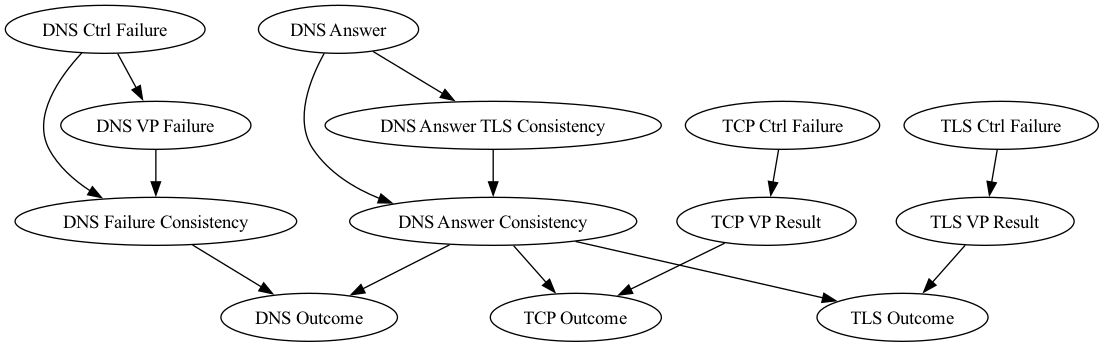

In [3]:
viz = web_analysis_bn_full.to_graphviz()
viz.draw('web_analysis_full.png', prog='dot')
Image('web_analysis_full.png')

In [10]:
web_analysis_bn = BayesianNetwork([
    ('DNS Ctrl Failure', 'DNS Outcome'),
    ('DNS Ctrl Failure', 'DNS Answer Meta'),
    #('Resolver config', 'DNS Outcome'),
    ('DNS Consistency', 'DNS Outcome'),
    ('DNS Answer Meta', 'DNS Consistency'),
    ('DNS Answer Meta', 'DNS TLS Consistency'),
    ('DNS TLS Consistency', 'DNS Consistency'),
])

In [11]:
#web_analysis_bn.save('web_analysi.bif')

In [12]:
viz = web_analysis_bn.to_graphviz()
viz.draw('web_analysis_simple.png', prog='dot')
Image('web_analysis_simple.png')

ImportError: requires pygraphviz http://pygraphviz.github.io/

In [13]:
def print_boilerplate():
    cpd_list = []
    for x in list(web_analysis_bn.nodes):
        var_name = x.lower().replace(' ', '_')
        var_name = f"cpd_{var_name}"
        s = f"{var_name} = TabularCPD('{x}', variable_card=2, values=[\n"
        parents = web_analysis_bn.get_parents(x)
        padding = " "*(int(len(s)/2))
        for _ in range(2):
            s += padding + "["
            s += ",".join("0." for x in range(len(parents)))
            s += "],\n"
        s += padding + f"],\n" 
        s += padding + f" # parents={parents}\n"
        s += padding + f"evidence={parents},\n"
        s += padding + f"evidence_card=[],\n"
        s += padding + "state_names = {\n"
        for p in parents:
            s += padding + f"'{p}': [],\n"
        s += "}\n"
        s += padding + ")"
        print(s)
        cpd_list.append(var_name)

In [14]:
dns_answer_states = [
"answer_is_bogon", 
"answer_matches_probe_asn", 
"answer_matches_probe_cc",
"answer_is_cloud_provider",
"answer_other"
]
dns_failure_states = [
    "none",
    "nxdomain",
    "server_failure"
]
tls_consistency_states = ["tls_consistent", "tls_inconsistent", "unknown"]
cpd_dns_ctrl_failure = TabularCPD(
    "DNS Ctrl Failure",
    variable_card=3,
    values=[
        [0.994],
        [0.004],
        [0.002],
    ],
    state_names={
        "DNS Ctrl Failure": dns_failure_states
    },
)
cpd_dns_vp_failure = TabularCPD(
    "DNS VP Failure",
    variable_card=3,
    values=[
        # "none",    "nxdomain", "server_failure"
        [0.994, 0.02, 0.02],
        [0.004, 0.98, 0.01],
        [0.002, 0.01, 0.98],
    ],
    evidence=["DNS Ctrl Failure"],
    evidence_card=[3],
    state_names={
        "DNS VP Failure": dns_failure_states,
        "DNS Ctrl Failure": dns_failure_states
    },
)
cpd_dns_failure_consistency = TabularCPD(
    "DNS Failure Consistency",
    variable_card=3,
    values=[
        # "none",    "nxdomain", "server_failure"
        [0.99, 0.01, 0.01, 0.94, 0.01, 0.01, 0.94, 0.01, 0.01], # ok
        [0.01, 0.05, 0.05, 0.01, 0.98, 0.92, 0.01, 0.92, 0.98], # expected_not_ok
        [0.01, 0.94, 0.94, 0.05, 0.01, 0.07, 0.05, 0.07, 0.01] # unexpected_not_ok
    ],
    evidence=["DNS Ctrl Failure", "DNS VP Failure"],
    evidence_card=[3, 3],
    state_names={
        "DNS Failure Consistency": [
            "ok", 
            "expected_not_ok",
            "unexpected_not_ok"
        ],
        "DNS VP Failure": dns_failure_states,
        "DNS Ctrl Failure": dns_failure_states
    },
)

cpd_dns_answer = TabularCPD(
    "DNS Answer",
    variable_card=5,
    values=[
        [0.004],
        [0.006],
        [0.06],
        [0.73],
        [0.2],
    ],
    state_names={
        "DNS Answer": dns_answer_states,
    },
)
cpd_dns_answer_tls_consistency = TabularCPD(
    "DNS Answer TLS Consistency",
    variable_card=3,
    values=[
        # "answer_is_bogon", "answer_matches_probe_asn", "answer_matches_probe_cc", "answer_is_cloud_provider", "answer_other"
        [0.01, 0.80, 0.75, 0.90, 0.94], # tls_consistent
        [0.05, 0.15, 0.20, 0.08, 0.04], # tls_inconsistent
        [0.94, 0.05, 0.05, 0.02, 0.02], # unknown
    ],
    evidence=["DNS Answer"],
    evidence_card=[5],
    state_names={
        "DNS Answer TLS Consistency": tls_consistency_states,
        "DNS Answer": dns_answer_states,
    },
)
cpd_dns_answer_consistency = TabularCPD(
    "DNS Answer Consistency",
    variable_card=2,
    values=[
        # "answer_is_bogon", "answer_matches_probe_asn",  "answer_matches_probe_cc", "answer_is_cloud_provider", "answer_other"
        # tls_consistent", "tls_inconsistent", "unknown
        [0.99, 0.001, 0.001, 0.999, 0.01, 0.3, 0.999, 0.001, 0.3, 0.999, 0.01, 0.8, 0.999, 0.001, 0.2], # consistent
        [0.01, 0.999, 0.999, 0.001, 0.99, 0.7, 0.001, 0.999, 0.7, 0.001, 0.99, 0.2, 0.001, 0.999, 0.8], # inconsistent
    ],
    # parents={parents}
    evidence=["DNS Answer", "DNS Answer TLS Consistency"],
    evidence_card=[5, 3],
    state_names={
        "DNS Answer": dns_answer_states,
        "DNS Answer TLS Consistency": tls_consistency_states,
        "DNS Answer Consistency": [
            "consistent",
            "inconsistent"
        ],
    },
)

cpd_dns_outcome = TabularCPD(
    "DNS Outcome",
    variable_card=3,
    values=[
        # Consistent, inconsistent
        [0.01, 0.01, 0.40, 0.8, 0.20, 0.90], # blocked
        [0.99, 0.01, 0.40, 0.2, 0.05, 0.01], # ok
        [0.00, 0.98, 0.20, 0.0, 0.75, 0.09], # down
    ],
    evidence=[
        "DNS Answer Consistency",
        "DNS Failure Consistency",
    ],
    evidence_card=[2, 3],
    state_names={
        "DNS Outcome": [
            "blocked",
            "ok",
            "down"
        ],
        "DNS Answer Consistency": ["consistent", "inconsistent"],
        "DNS Failure Consistency": [
            "ok", 
            "expected_not_ok",
            "unexpected_not_ok"
        ],
    },
)

In [15]:
tcp_failure_states = [
    "none",
    "connection_reset",
    "timeout",
    "other"
]

cpd_tcp_ctrl_failure = TabularCPD(
    "TCP Ctrl Failure",
    variable_card=4,
    values=[
        [0.980],
        [0.001],
        [0.014],
        [0.005]
    ],
    state_names={
        "TCP Ctrl Failure": tcp_failure_states
    },
)

cpd_tcp_vp_result = TabularCPD(
    "TCP VP Result",
    variable_card=5,
    values=[
        # "none", "connection_reset", "timeout", "other"
        [0.980, 0.02, 0.01, 0.01], # none
        [0.001, 0.14, 0.02, 0.06], # connection_reset
        [0.010, 0.05, 0.10, 0.06], # timeout
        [0.009, 0.07, 0.02, 0.12], # other
        [0.009, 0.72, 0.85, 0.75], # down
    ],
    evidence=["TCP Ctrl Failure"],
    evidence_card=[4],
    state_names={
        "TCP VP Result": tcp_failure_states + ["down"],
        "TCP Ctrl Failure": tcp_failure_states
    },
)

cpd_tcp_outcome = TabularCPD(
    "TCP Outcome",
    variable_card=4,
    values=[
        # consistent inconsistent
        # "none", "connection_reset", "timeout", "other", "down"
        [0.02, 0.95, 0.90, 0.85, 0.01, 0.07, 0.07, 0.07, 0.07, 0.05], # blocked
        [0.95, 0.01, 0.01, 0.01, 0.08, 0.01, 0.01, 0.01, 0.01, 0.01], # ok
        [0.02, 0.03, 0.08, 0.09, 0.01, 0.07, 0.07, 0.07, 0.07, 0.09], # down
        [0.01, 0.01, 0.01, 0.05, 0.90, 0.85, 0.85, 0.85, 0.85, 0.85], # unknown
    ],
    evidence=["DNS Answer Consistency", "TCP VP Result"],
    evidence_card=[2, 5],
    state_names={
        "DNS Answer Consistency": ["consistent", "inconsistent"],
        "TCP VP Result": tcp_failure_states + ["down"],
        "TCP Outcome": ["blocked", "ok", "down", "unknown"]
    },
)

In [16]:
tls_ctrl_failure_states = [
    "none",
    "bad_certificate",
    "other"
]

tls_vp_result_states = [
    "none",
    "bad_certificate",
    "connection_reset_after_ch",
    "timeout_after_ch",
    "timeout",
    "connection_reset",
    "other",
    "down"
]

cpd_tls_ctrl_failure = TabularCPD(
    "TLS Ctrl Failure",
    variable_card=3,
    values=[
        [0.980],
        [0.005],
        [0.015],
    ],
    state_names={
        "TLS Ctrl Failure": tls_ctrl_failure_states
    },
)

cpd_tls_vp_result = TabularCPD(
    "TLS VP Result",
    variable_card=8,
    values=[
        # "none", "bad_certificate", "other"
        [0.97, 0.02, 0.01], # none
        [0.005, 0.10, 0.01], # bad_certificate
        [0.005, 0.01, 0.05], # connection_reset_after_ch
        [0.005, 0.01, 0.05], # timeout_after_ch
        [0.005, 0.01, 0.05], # timeout
        [0.005, 0.01, 0.05], # connection_reset
        [0.004, 0.02, 0.12], # other
        [0.001, 0.82, 0.66], # down
    ],
    evidence=["TLS Ctrl Failure"],
    evidence_card=[3],
    state_names={
        "TLS VP Result": tls_vp_result_states,
        "TLS Ctrl Failure": tls_ctrl_failure_states
    },
)

cpd_tls_outcome = TabularCPD(
    "TLS Outcome",
    variable_card=4,
    values=[
        # consistent inconsistent
        # "none", "bad_certificate", "connection_reset_after_ch", "timeout_after_ch", "timeout" "connection_reset" "other" "down"
        [0.02, 0.95, 0.90, 0.85, 0.55, 0.65, 0.07, 0.07, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02], # blocked
        [0.95, 0.01, 0.01, 0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], # ok
        [0.02, 0.03, 0.07, 0.09, 0.40, 0.25, 0.07, 0.07, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05], # down
        [0.01, 0.01, 0.02, 0.05, 0.03, 0.09, 0.85, 0.85, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92], # unknown
    ],
    evidence=["DNS Answer Consistency", "TLS VP Result"],
    evidence_card=[2, 8],
    state_names={
        "DNS Answer Consistency": ["consistent", "inconsistent"],
        "TLS VP Result": tls_vp_result_states,
        "TLS Outcome": ["blocked", "ok", "down", "unknown"]
    },
)

In [17]:
cpd_list = [
    cpd_dns_ctrl_failure, 
    cpd_dns_vp_failure, 
    cpd_dns_failure_consistency, 
    cpd_dns_answer, 
    cpd_dns_answer_tls_consistency,
    cpd_dns_answer_consistency, 
    cpd_dns_outcome,
    cpd_tcp_ctrl_failure,
    cpd_tcp_vp_result,
    cpd_tcp_outcome,
    cpd_tls_ctrl_failure,
    cpd_tls_vp_result,
    cpd_tls_outcome
]
web_analysis_bn_full.add_cpds(*cpd_list)

In [121]:
web_analysis_bn_full.check_model()

True

In [19]:
web_analysis_bn_full.save('web-analysis-full.bif')

In [ ]:
from oonipipeline

In [122]:
from pgmpy.inference import VariableElimination

In [123]:
infer = VariableElimination(web_analysis_bn_full)

In [124]:
print(infer.query(['DNS Outcome']))

+----------------------+--------------------+
| DNS Outcome          |   phi(DNS Outcome) |
+======================+====================+
| DNS Outcome(blocked) |             0.0874 |
+----------------------+--------------------+
| DNS Outcome(ok)      |             0.8945 |
+----------------------+--------------------+
| DNS Outcome(down)    |             0.0181 |
+----------------------+--------------------+


In [74]:
print(infer.query(
    ['DNS Outcome'], 
    evidence={
        #'DNS TLS Consistency': 'tls_inconsistent',
        "DNS Answer": "answer_is_bogon", 
    }
))

+----------------------+--------------------+
| DNS Outcome          |   phi(DNS Outcome) |
+======================+====================+
| DNS Outcome(blocked) |             0.7836 |
+----------------------+--------------------+
| DNS Outcome(ok)      |             0.2031 |
+----------------------+--------------------+
| DNS Outcome(down)    |             0.0133 |
+----------------------+--------------------+


In [78]:
print(infer.query(
    ['DNS Outcome'], 
    evidence={
        'DNS Answer TLS Consistency': 'tls_consistent',
        "DNS Answer": "answer_matches_probe_cc", 
    }
))

+----------------------+--------------------+
| DNS Outcome          |   phi(DNS Outcome) |
+======================+====================+
| DNS Outcome(blocked) |             0.0168 |
+----------------------+--------------------+
| DNS Outcome(ok)      |             0.9646 |
+----------------------+--------------------+
| DNS Outcome(down)    |             0.0186 |
+----------------------+--------------------+


In [79]:
print(infer.query(
    ['DNS Outcome'], 
    evidence={
        'DNS Answer TLS Consistency': 'tls_inconsistent',
        "DNS Answer": "answer_matches_probe_cc", 
    }
))

+----------------------+--------------------+
| DNS Outcome          |   phi(DNS Outcome) |
+======================+====================+
| DNS Outcome(blocked) |             0.7913 |
+----------------------+--------------------+
| DNS Outcome(ok)      |             0.1955 |
+----------------------+--------------------+
| DNS Outcome(down)    |             0.0133 |
+----------------------+--------------------+


In [145]:
CLOUD_PROVIDERS_ASNS = [
    13335,  # Cloudflare: https://www.peeringdb.com/net/4224
    209242, #	Cloudflare London, LLC	
    20940,  # Akamai: https://www.peeringdb.com/net/2
    9002,  # Akamai RETN
    16625, # Akamai Technologies, Inc.	
    63949, # Akamai Technologies, Inc.	
    16509, #	Amazon.com, Inc.
    14618, #	Amazon.com, Inc.	
    15169, #	Google LLC
    396982,  # Google Cloud: https://www.peeringdb.com/net/30878
    54113, #	Fastly, Inc
    8075, # Microsoft Corporation
    8068, #	Microsoft Corporation
]
def is_cloud_provider(as_number):
    return as_number in CLOUD_PROVIDERS_ASNS
    
def find_relevant_control(wo, web_ctrl_observations):
    for ctrl in web_ctrl_observations:
        if wo.ip == ctrl.ip:
            return ctrl

def observations_to_features(web_obs, web_ctrl_observations):
    for wo in web_observations:
        ctrl = find_relevant_control(wo, web_control_observations)
        yield produce_state(wo, ctrl)

def produce_state(wo, ctrl):
    state = {
        'DNS Ctrl Failure': None,
        'DNS VP Failure': None,
        'DNS Answer': None,
        'DNS Answer TLS Consistency': None,
        'TCP Ctrl Failure': None,
        'TCP VP Result': None,
        'TLS Ctrl Failure': None,
        'TLS VP Result': None
    }
    if wo.dns_failure is not None:
        if wo.dns_failure in ('dns_nxdomain_error', 'android_dns_cache_no_data'):
            state['DNS VP Failure'] = 'nxdomain'
        else:
            state['DNS VP Failure'] = 'server_failure'
    elif wo.dns_answer is not None:
            state['DNS VP Failure'] = 'none'

    if ctrl:
        if ctrl.dns_failure is not None:
            if wo.dns_failure == 'dns_nxdomain_error':
                state['DNS Ctrl Failure'] = 'nxdomain'
            else:
                state['DNS Ctrl Failure'] = 'server_failure'
        elif ctrl.dns_success:
            state['DNS Ctrl Failure'] = 'none'

    if wo.dns_answer is not None:
        if wo.ip_is_bogon:
            state['DNS Answer'] = 'answer_is_bogon'
        elif wo.ip_asn == wo.probe_meta.probe_asn:
            state['DNS Answer'] = 'answer_matches_probe_asn'
        elif wo.ip_as_cc == wo.probe_meta.probe_cc:
            state['DNS Answer'] = 'answer_matches_probe_cc'
        elif is_cloud_provider(wo.ip_asn):
            state['DNS Answer'] = 'answer_is_cloud_provider'
        else:
            state['DNS Answer'] = 'answer_other'

    if ctrl:
        tcp_ctrl_state = None
        if ctrl.ip and (ctrl.tcp_failure is not None or ctrl.tcp_success):
            if ctrl.tcp_failure is None:
                tcp_ctrl_state = 'none'
            elif ctrl.tcp_failure == 'connection_reset':
                tcp_ctrl_state = 'connection_reset'
            elif ctrl.tcp_failure in ('generic_timeout_error', 'timed_out'):
                tcp_ctrl_state = 'timeout'
            else:
                tcp_ctrl_state = 'other'

        tls_consistency_state = None
        if wo.ip == ctrl.ip and (ctrl.tls_success or ctrl.tls_failure is not None):
            if ctrl.tls_failure is None:
                tls_consistency_state = 'tls_consistent'
            elif ctrl.tls_failure.startswith("ssl_"):
                tls_consistency_state = 'tls_inconsistent'
            else:
                tls_consistency_state = 'unknown'
        else:
            tls_consistency_state = 'unknown'

        if (tcp_ctrl_state and tcp_ctrl_state != 'none'):
            tls_consistency_state = 'tls_inconsistent'
        state['DNS Answer TLS Consistency'] = tls_consistency_state
        state['TCP Ctrl Failure'] = tcp_ctrl_state
    
    if wo.ip and (wo.tcp_failure is not None or wo.tcp_success):
        tcp_vp_result = None
        if wo.tcp_failure is None:
            tcp_vp_result = 'none'
        elif wo.tcp_failure == 'connection_reset':
            tcp_vp_result = 'connection_reset'
        elif wo.tcp_failure in ('generic_timeout_error', 'timed_out'):
            tcp_vp_result = 'timeout'
        else:
            tcp_vp_result = 'other'
        if tcp_vp_result != 'none' and tcp_vp_result == state['TCP Ctrl Failure']:
            tcp_vp_result = 'down'
        state['TCP VP Result'] = tcp_vp_result

    if ctrl:
        if ctrl.ip and (ctrl.tls_failure is not None or ctrl.tls_success):
            if ctrl.tls_failure is None:
                state['TLS Ctrl Failure'] = 'none'
            elif ctrl.tls_failure.startswith('ssl_'):
                state['TLS Ctrl Failure'] = 'bad_certificate'
            else:
                state['TLS Ctrl Failure'] = 'other'
    
    if wo.ip and (wo.tls_failure is not None or wo.tls_failure):
        tls_vp_result = None
        if wo.tls_failure is None:
            tls_vp_result = 'none'
        elif wo.tls_failure.startswith('ssl_'):
            tls_vp_result = 'bad_certificate'
        elif wo.tls_failure == 'connection_reset':
            tls_vp_result = 'connection_reset'
            if wo.tls_handshake_last_operation and wo.tls_handshake_last_operation == 'write_1':
                tls_vp_result = 'connection_reset_after_ch'
        elif wo.tcp_failure in ('generic_timeout_error', 'timed_out'):
            tls_vp_result = 'timeout'
            if wo.tls_handshake_last_operation and wo.tls_handshake_last_operation == 'write_1':
                tls_vp_result = 'timeout_after_ch'
        else:
            tls_vp_result = 'other'
        if tls_vp_result != 'none' and state['TLS Ctrl Failure'] != 'none':
            tls_vp_result = 'down'
        state['TLS VP Result'] = tls_vp_result
    return state

In [146]:
netinfodb = NetinfoDB(datadir=Path("datadir"), download=False)
# 20231129041111.939896_NP_webconnectivity_32105af63774eabf
#raw_msmt = get_measurement_dict_by_uid("20240804233508.181041_TR_webconnectivity_9a7272e520f3d836")
raw_msmt = get_measurement_dict_by_uid("20231129041111.939896_NP_webconnectivity_32105af63774eabf")
msmt = load_measurement(msmt=raw_msmt)
web_observations, web_control_observations = measurement_to_observations(
    msmt, netinfodb=netinfodb
)

In [147]:
for features in observations_to_features(web_observations, web_control_observations):
    evidence = {k: v for k,v in features.items() if v is not None}
    print(features)
    print(infer.query(
        ['TLS Outcome'],
        evidence=evidence
    ))
    print(infer.query(
        ['DNS Outcome'],
        evidence=evidence
    ))

{'DNS Ctrl Failure': None, 'DNS VP Failure': 'none', 'DNS Answer': 'answer_is_cloud_provider', 'DNS Answer TLS Consistency': 'tls_inconsistent', 'TCP Ctrl Failure': 'other', 'TCP VP Result': 'down', 'TLS Ctrl Failure': None, 'TLS VP Result': None}
+----------------------+--------------------+
| TLS Outcome          |   phi(TLS Outcome) |
+======================+====================+
| TLS Outcome(blocked) |             0.0202 |
+----------------------+--------------------+
| TLS Outcome(ok)      |             0.0189 |
+----------------------+--------------------+
| TLS Outcome(down)    |             0.0498 |
+----------------------+--------------------+
| TLS Outcome(unknown) |             0.9111 |
+----------------------+--------------------+
+----------------------+--------------------+
| DNS Outcome          |   phi(DNS Outcome) |
+======================+====================+
| DNS Outcome(blocked) |             0.7872 |
+----------------------+--------------------+
| DNS Outcome(ok